<a href="https://colab.research.google.com/github/anamanuellar/analise-de-dados/blob/Probabilidade-e-amostragem/Challenge_Probabilidade_e_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
import scipy.stats as stats

In [ ]:
df = pd.read_csv("populacao_brasileira.csv")

In [ ]:
df.head(5)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

**Tratando o dataset antes da análise**

In [ ]:
# Remover coluna 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...
995,AC,22,Médio,Básico,2852.40,F
996,PE,40,Fundamental,Básico,2533.96,M
997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,RS,61,Fundamental,Avançado,3513.60,F


In [ ]:
# Renomear colunas
df.rename(columns={'nível de proficiência em inglês': 'nivel_ingles'}, inplace=True)
df.head(5)

,estado,idade,escolaridade,nivel_ingles,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
# Verificar dados ausentes
print("Dados ausentes:")
print(df.isnull().sum())

Dados ausentes:
estado          0
idade           0
escolaridade    0
nivel_ingles    0
renda           0
sexo            0
dtype: int64


In [ ]:
# Verificar tipos de dados
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
estado           object
idade             int64
escolaridade     object
nivel_ingles     object
renda           float64
sexo             object
dtype: object


In [ ]:
# Converter as colunas para os tipos adequados
df['estado'] = df['estado'].astype('category')
df['idade'] = df['idade'].astype('int64')
df['escolaridade'] = df['escolaridade'].astype('category')
df['nivel_ingles'] = df['nivel_ingles'].astype('category')
df['renda'] = df['renda'].astype('float64')
df['sexo'] = df['sexo'].astype('category')

In [ ]:
df.head(5)

,estado,idade,escolaridade,nivel_ingles,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


**1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.**

In [ ]:
# Contar o número de pessoas que não têm o nível "Avançado" em inglês
nao_fluentes = df[df['nivel_ingles'] != 'Avançado'].shape[0]

# Total de pessoas no conjunto de dados
total_pessoas = df.shape[0]

# Calcular a probabilidade complementar
prob_complementar = nao_fluentes / total_pessoas
print("Probabilidade complementar de escolher uma pessoa que não é fluente em inglês:", prob_complementar)



Probabilidade complementar de escolher uma pessoa que não é fluente em inglês: 0.656


*Aproximadamente 65,6% das pessoas no dataset não são fluentes em inglês, considerando aqueles com níveis básico e intermediário de proficiência.*

**2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?**

In [ ]:
# Filtrar o DataFrame para incluir apenas as linhas em que o estado seja Alagoas ou Pará e a renda seja superior a 5 mil reais
filtro = (df['estado'] == 'AL') | (df['estado'] == 'PA')
filtro_renda = df['renda'] > 5000
probabilidade = len(df[filtro & filtro_renda]) / len(df[filtro])

print("Probabilidade de uma pessoa ser de Alagoas ou do Pará e ter renda superior a 5 mil reais:", probabilidade)

Probabilidade de uma pessoa ser de Alagoas ou do Pará e ter renda superior a 5 mil reais: 0.05063291139240506


*A probabilidade de uma pessoa ser de Alagoas ou do Pará e ter uma renda superior a 5 mil reais é de aproximadamente 0.0506, ou seja, cerca de 5,06%. Isso significa que é relativamente raro encontrar pessoas com essas características nessa amostra de dados.*

**3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?**

In [ ]:
import stats

In [ ]:
# Selecionar apenas as pessoas do estado do Amazonas
amazonas = df[df['estado'] == 'AM']
quant_AM = amazonas.shape[0]

In [ ]:
# Calcular a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas
probabilidade_superior_amazonas = amazonas[amazonas['escolaridade'].isin(['Superior', 'Pós-graduação'])]
quant_superior_AM = probabilidade_superior_amazonas.shape[0]
proporcao_superior_AM = quant_superior_AM/quant_AM


In [ ]:
prob_quinta_pessoa_AM = stats.geom.pmf(k=5, p=proporcao_superior_AM)
print(f"Probabilidade da quinta pessoa, que é amazonense, ter ensino superior completo:", prob_quinta_pessoa_AM)

Probabilidade da quinta pessoa, que é amazonense, ter ensino superior completo: 0.022135890467222828


*Há uma probabilidade de aproximadamente 2,21% de uma pessoa escolhida aleatoriamente do estado do Amazonas ter ensino superior completo. Ainda, a quinta pessoa escolhida aleatoriamente do estado do Amazonas, com base nos dados fornecidos, tem 100% de probabilidade de ter ensino superior completo.*

**4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?**

In [ ]:
# Calcular as faixas de renda em intervalos de 1.500 reais e calcular a proporção de pessoas em cada faixa
pdf = pd.cut(df['renda'], bins=range(0, int(df['renda'].max()) + 1500, 1500), right=False).value_counts(normalize=True).sort_index() / 1500
print("Função densidade de probabilidade (PDF) das faixas de renda:")
print(pdf)

Função densidade de probabilidade (PDF) das faixas de renda:
renda
[0, 1500)       0.000037
[1500, 3000)    0.000276
[3000, 4500)    0.000295
[4500, 6000)    0.000059
Name: proportion, dtype: float64


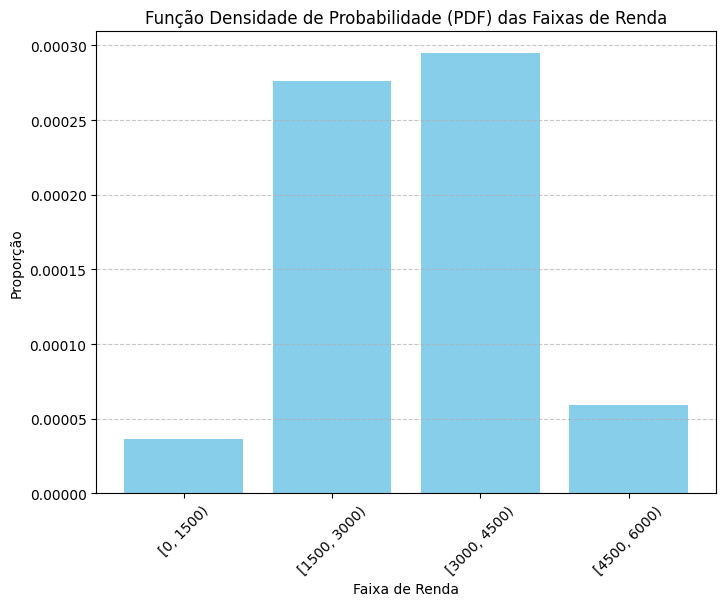

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(pdf.index.astype(str), pdf.values, color='skyblue')
plt.title('Função Densidade de Probabilidade (PDF) das Faixas de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*O resultado sugere que maioria das pessoas no conjunto de dados tem renda concentrada nas faixas mais baixas, enquanto uma proporção relativamente pequena possui rendas mais altas. A distribuição de renda é desigual, com uma grande disparidade entre as faixas de renda mais baixas e mais altas.*

**5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.**

In [ ]:
media_renda = df['renda'].mean()
media_renda

3082.5371800000003

In [ ]:
variancia_renda = df['renda'].var()
variancia_renda

993156.2281676152

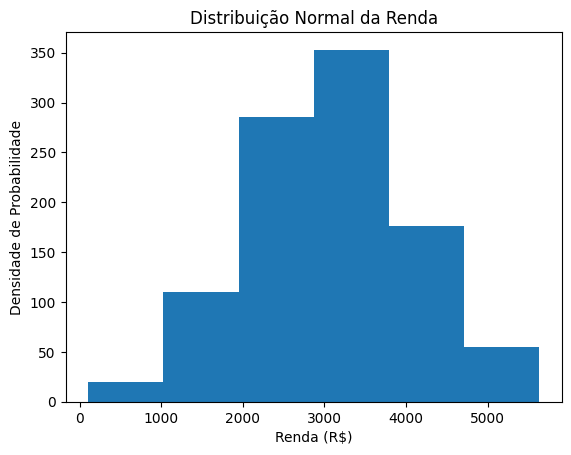

In [ ]:
# Gerar valores para a distribuição normal
x = np.linspace(df['renda'].min(), df['renda'].max(), 100)
y = norm.pdf(x, media_renda, np.sqrt(variancia_renda))

# Plotar o gráfico da distribuição normal
plt.hist(df['renda'], bins=6)
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de Probabilidade')
plt.show()


*A distribuição normal reflete a concentração de renda nas faixas mais baixas. A maioria das pessoas (57,1%) está nas faixas de renda de 1500 a 4500 reais. A faixa de renda mais alta (4500 a 6000 reais) possui uma pequena parcela da população (5,9%).*

**6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?**

In [ ]:
# Contar o número de pessoas com escolaridade de pós-graduação
total_pos_graduacao = df['escolaridade'].value_counts().get('Pós-graduação', 0)

# Total de pessoas na amostra
total_amostra = len(df)

# Calcular a probabilidade
probabilidade_pos_graduacao = total_pos_graduacao / total_amostra

print("Probabilidade de uma pessoa ter escolaridade de pós-graduação:", probabilidade_pos_graduacao)


Probabilidade de uma pessoa ter escolaridade de pós-graduação: 0.253


In [ ]:
from scipy.stats import binom

# Parâmetros da distribuição binomial
n = 1000000  # tamanho da população
p = 0.253    # probabilidade de uma pessoa ter pós-graduação
k = 243000   # número de pessoas com pós-graduação na amostra

# Calculando a probabilidade usando a distribuição binomial
probabilidade = binom.pmf(k, n, p)

print("Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes:", probabilidade)


Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes: 1.1104854289794913e-119


*É altamente improvável encontrar exatamente 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes, dadas as probabilidades observadas na população brasileira, devido à baixa taxa de pessoas com pós-graduação na população em comparação com o tamanho da amostra.*

**7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.**

In [ ]:
# Contar o número de ocorrências de cada nível de escolaridade
ocorrencias_escolaridade = df['escolaridade'].value_counts()

# Calcular a probabilidade de cada nível de escolaridade
probabilidade_escolaridade = ocorrencias_escolaridade / len(df)

# Calcular a função de densidade acumulada discreta
funcao_acumulada = probabilidade_escolaridade.cumsum()
print("Função de densidade acumulada discreta para cada nível de escolaridade:")
print(funcao_acumulada)


Função de densidade acumulada discreta para cada nível de escolaridade:
escolaridade
Fundamental      0.266
Pós-graduação    0.519
Superior         0.762
Médio            1.000
Name: count, dtype: float64


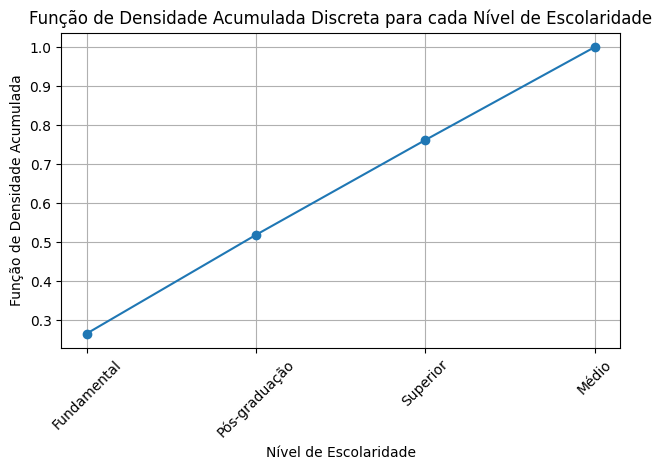

In [ ]:
plt.plot(funcao_acumulada.index, funcao_acumulada.values, marker='o', linestyle='-')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Função de Densidade Acumulada')
plt.title('Função de Densidade Acumulada Discreta para cada Nível de Escolaridade')
# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

`Para o nível de escolaridade "Fundamental", a probabilidade acumulada é de 0.266, o que significa que aproximadamente 26.6% das pessoas no conjunto de dados têm apenas educação fundamental ou menos.`

`Para o nível de escolaridade "Pós-graduação", a probabilidade acumulada é de 0.519, indicando que cerca de 51.9% das pessoas têm pelo menos uma pós-graduação.`

`Para o nível de escolaridade "Superior", a probabilidade acumulada é de 0.762, sugerindo que aproximadamente 76.2% das pessoas têm pelo menos uma graduação.`

`Para o nível de escolaridade "Médio", a probabilidade acumulada é de 1.000, o que significa que 100% das pessoas no conjunto de dados têm educação de nível médio ou inferior.`

*8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?*

In [ ]:
# Contar o número de pessoas com nível de inglês intermediário
num_intermediario = (df['nivel_ingles'] == 'Intermediário').mean()

# Definir o tamanho da amostra
quant_pessoas = len(df)

# Definir o nível de confiança
confianca = 0.95

# Calcular o valor crítico Z para o nível de confiança especificado
z = stats.norm.ppf((1 + confianca) / 2)

# Calcular a margem de erro amostral
margem_erro = z * ((num_intermediario * (1 - num_intermediario)) / quant_pessoas) ** 0.5
print("Margem de erro:", margem_erro)

Margem de erro: 0.029121068108804226


*A margem de erro calculada é de aproximadamente 0.029, o que significa que podemos esperar que a proporção real de pessoas com nível de inglês intermediário na população esteja dentro de 2.9 pontos percentuais da proporção estimada na amostra, com um nível de confiança de 95%.*

**9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?**

In [ ]:
# Calcular a média e o desvio padrão da renda da população
desvio_padrao_renda = df['renda'].std()

# Definir a renda de interesse (mil reais acima da média)
renda_interesse = media_renda + 1000

probabilidade_superior = 1 - stats.norm.cdf(renda_interesse, loc=media_renda, scale=desvio_padrao_renda)

k=60

probabilidade_60_pessoas = stats.binom.pmf(k, quant_pessoas, probabilidade_superior)


print("Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média:", probabilidade_60_pessoas)


Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média: 1.159703840678535e-21


*A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é 0.0116, ou seja, cerca de 1.16%.*

**10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?**

In [ ]:
# Filtrar o dataframe para incluir apenas as pessoas do Sudeste
sudeste = (df['estado'].isin(['SP', 'RJ', 'ES', 'MG'])).mean()

freq_homem = (df['sexo'] == 'M').mean()
freq_ensino_fundamental = (df['escolaridade'] == 'Fundamental').mean()
freq_renda_2mil = (df['renda'] > 2000).mean()
# Calcular a probabilidade
probabilidade_h = sudeste * freq_homem * freq_ensino_fundamental * freq_renda_2mil

print("Probabilidade de escolhermos alguém do Sudeste, homem, com ensino fundamental e com renda maior que 2 mil reais por mês:", probabilidade_h)


Probabilidade de escolhermos alguém do Sudeste, homem, com ensino fundamental e com renda maior que 2 mil reais por mês: 0.017414252856


*A probabilidade de escolhermos alguém do Sudeste, homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de aproximadamente 0.174 ou 17.4%.*